In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv("C:\\Users\\Vinutha\\Downloads\\train.csv")
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [6]:
print('Percentage of Missing Values in each column:')
print(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)[ round(df.isnull().sum()/len(df.index),2) > 0 ] )

#5 features have more than 45% missing values.

Percentage of Missing Values in each column:
PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
dtype: float64


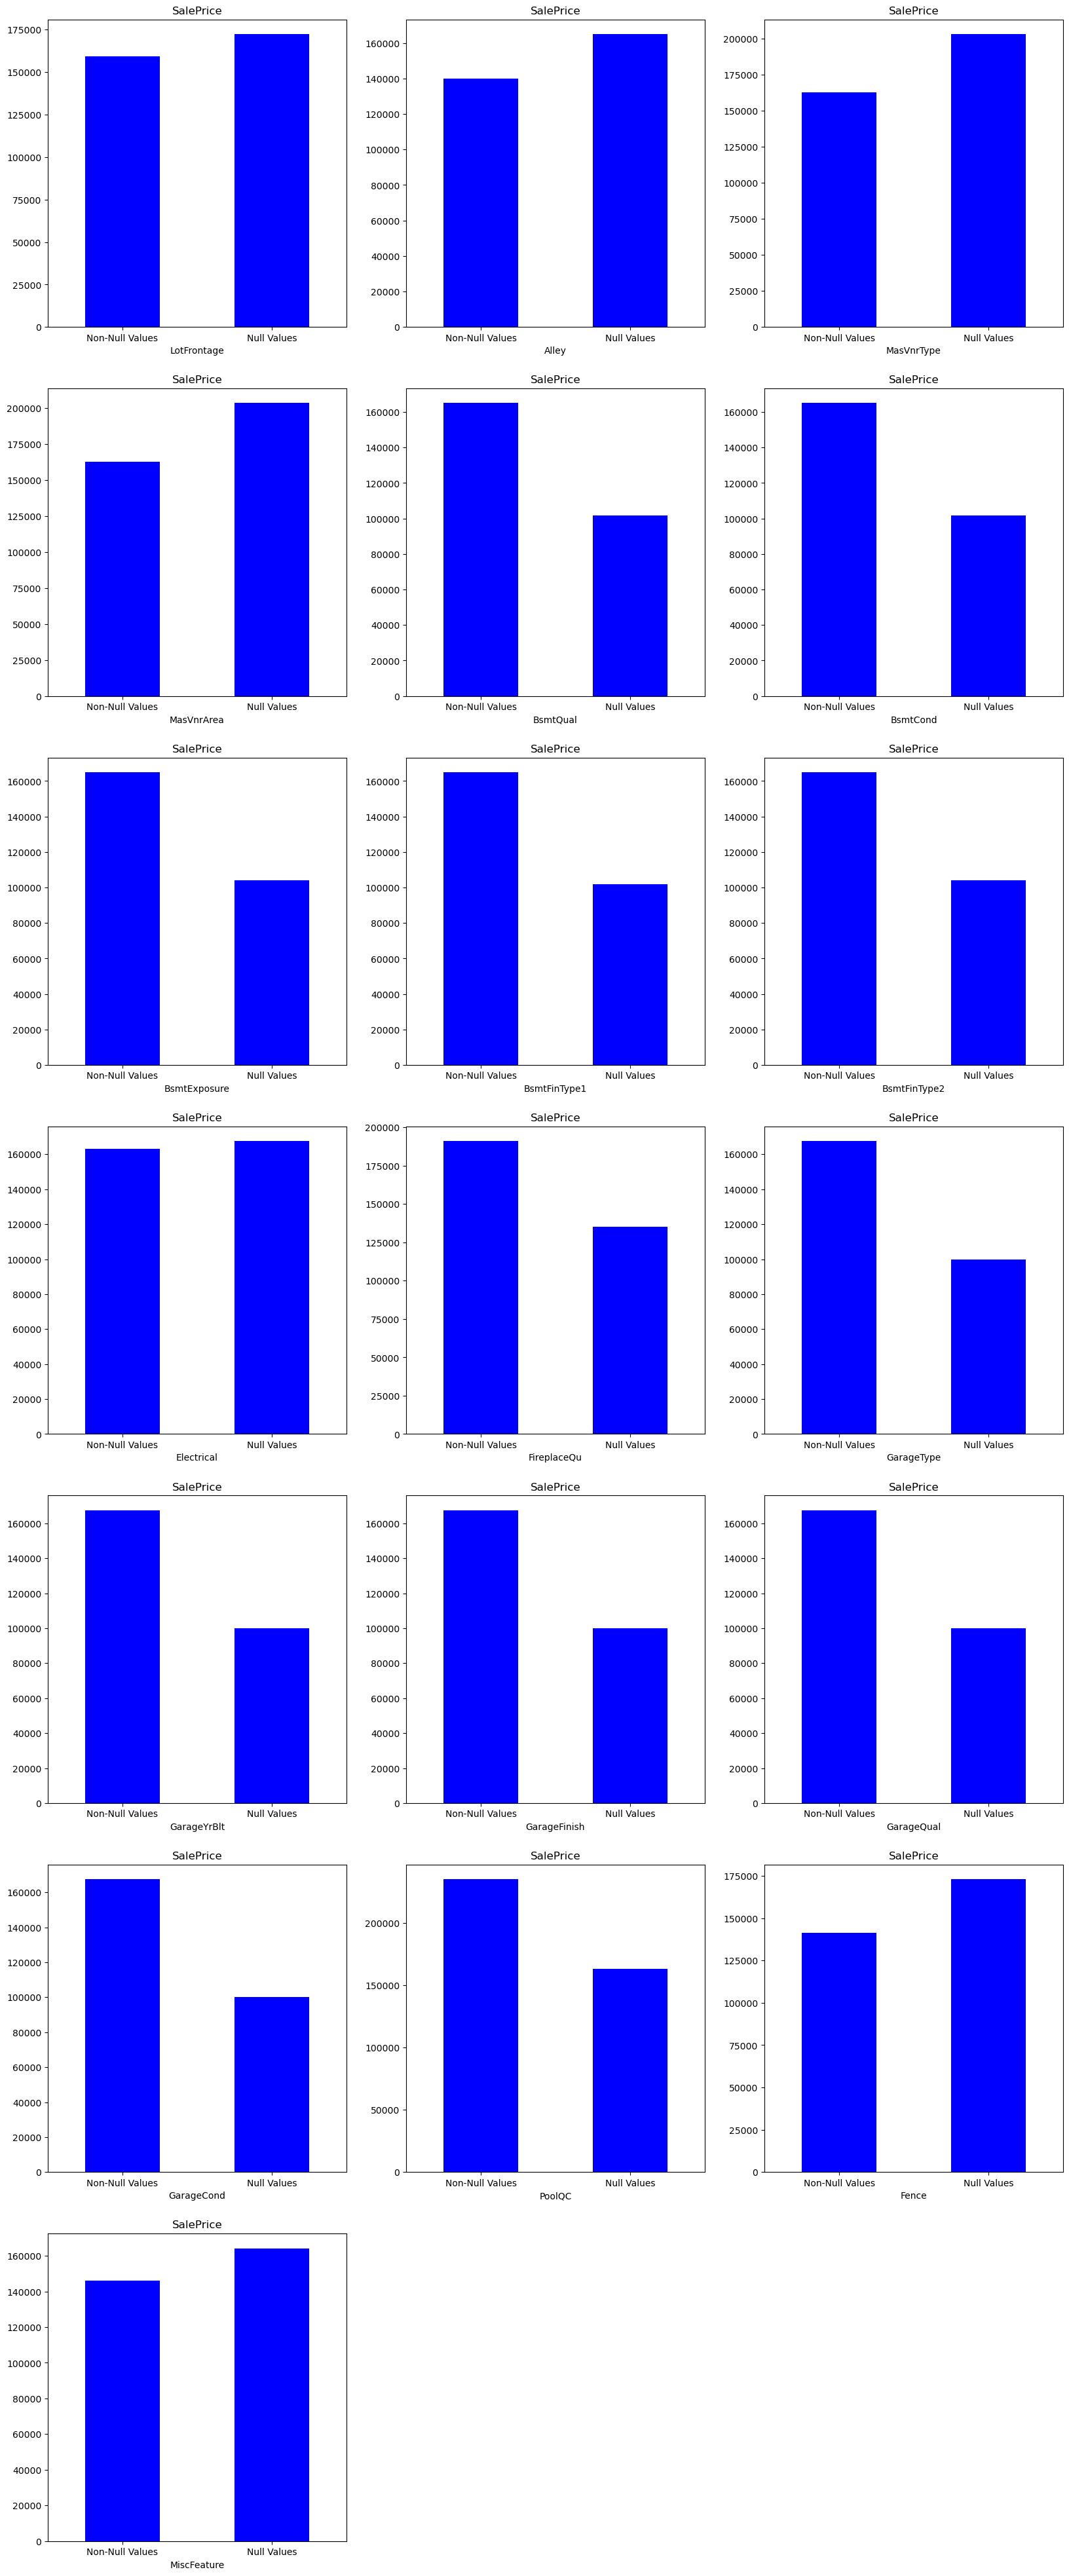

In [7]:
# Checking if NaN Values have any impact on the Sale Price or not
nan_col = []
for i in df.columns:
    if df[i].isnull().sum() > 0:
        nan_col.append(i)
df_copy = df.copy()    
fig,axs= plt.subplots(7,3,figsize=(20,50),squeeze=True)
for i,ax in zip(nan_col,axs.flatten()):    
    df_copy[i] = np.where(df_copy[i].isnull(), 'Null Values', 'Non-Null Values') 
    df_copy.groupby(i)['SalePrice'].median().plot.bar(color = list('b'),rot=0,ax=ax,subplots=True)
axs[6,1].set_axis_off()    
axs[6,2].set_axis_off() 
plt.show()

Text(0.5, 1.0, 'House Price vs YearSold')

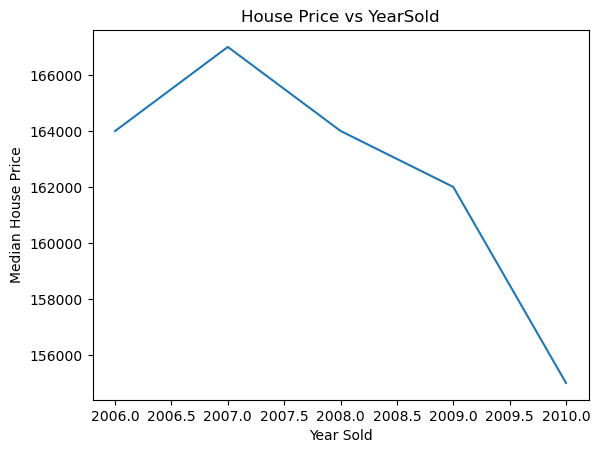

In [8]:
# Chekcing if the median price changes with the year sold
df['YrSold'] = df['YrSold'].astype('int')
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

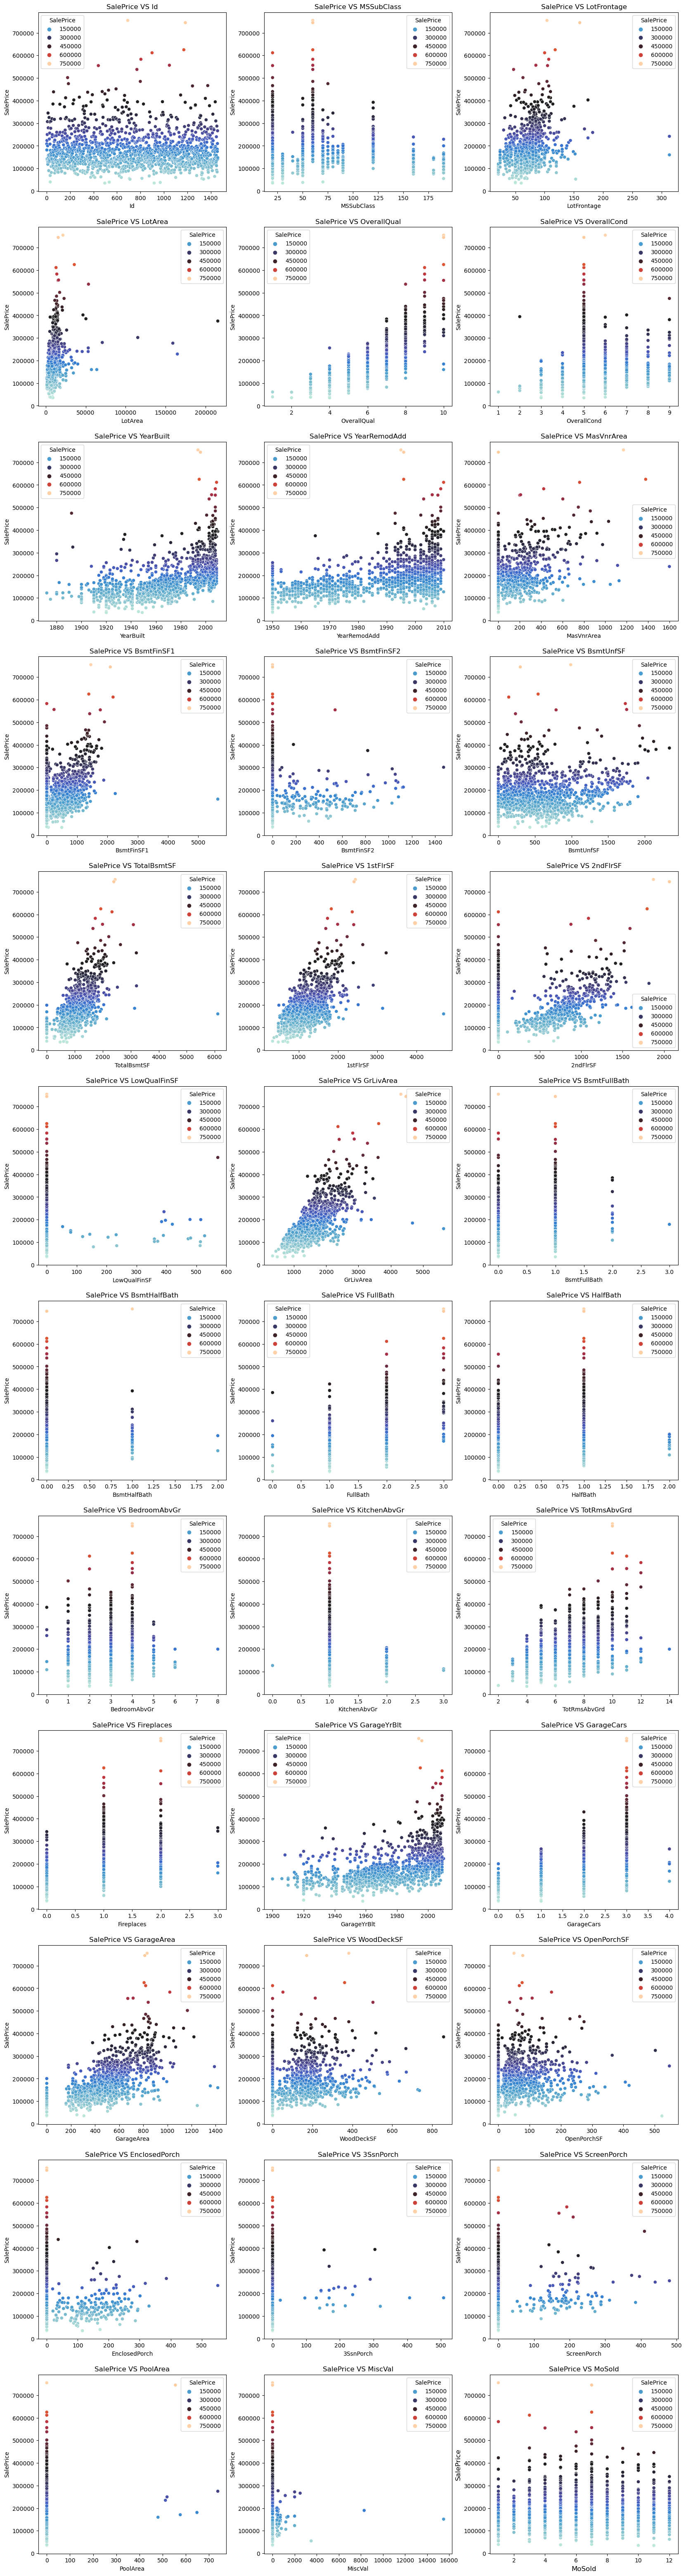

In [10]:
#Visualising numerical predictor variables with Target Variables
df_num = df.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(12,3,figsize=(20,80))
for i,ax in zip(df_num.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=df_num,ax=ax,palette='icefire')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_title('SalePrice'+' VS '+str(i))
    
    
#Observations from the above plot:-

#New properties are costlier than older properties.
#GRLiving Area has a direct corelation with the proce of the property.
#Total basement area, which is linearly related with the total living area, also is directly proportional to the price of the property.
#Month sold has no effect on the price.    

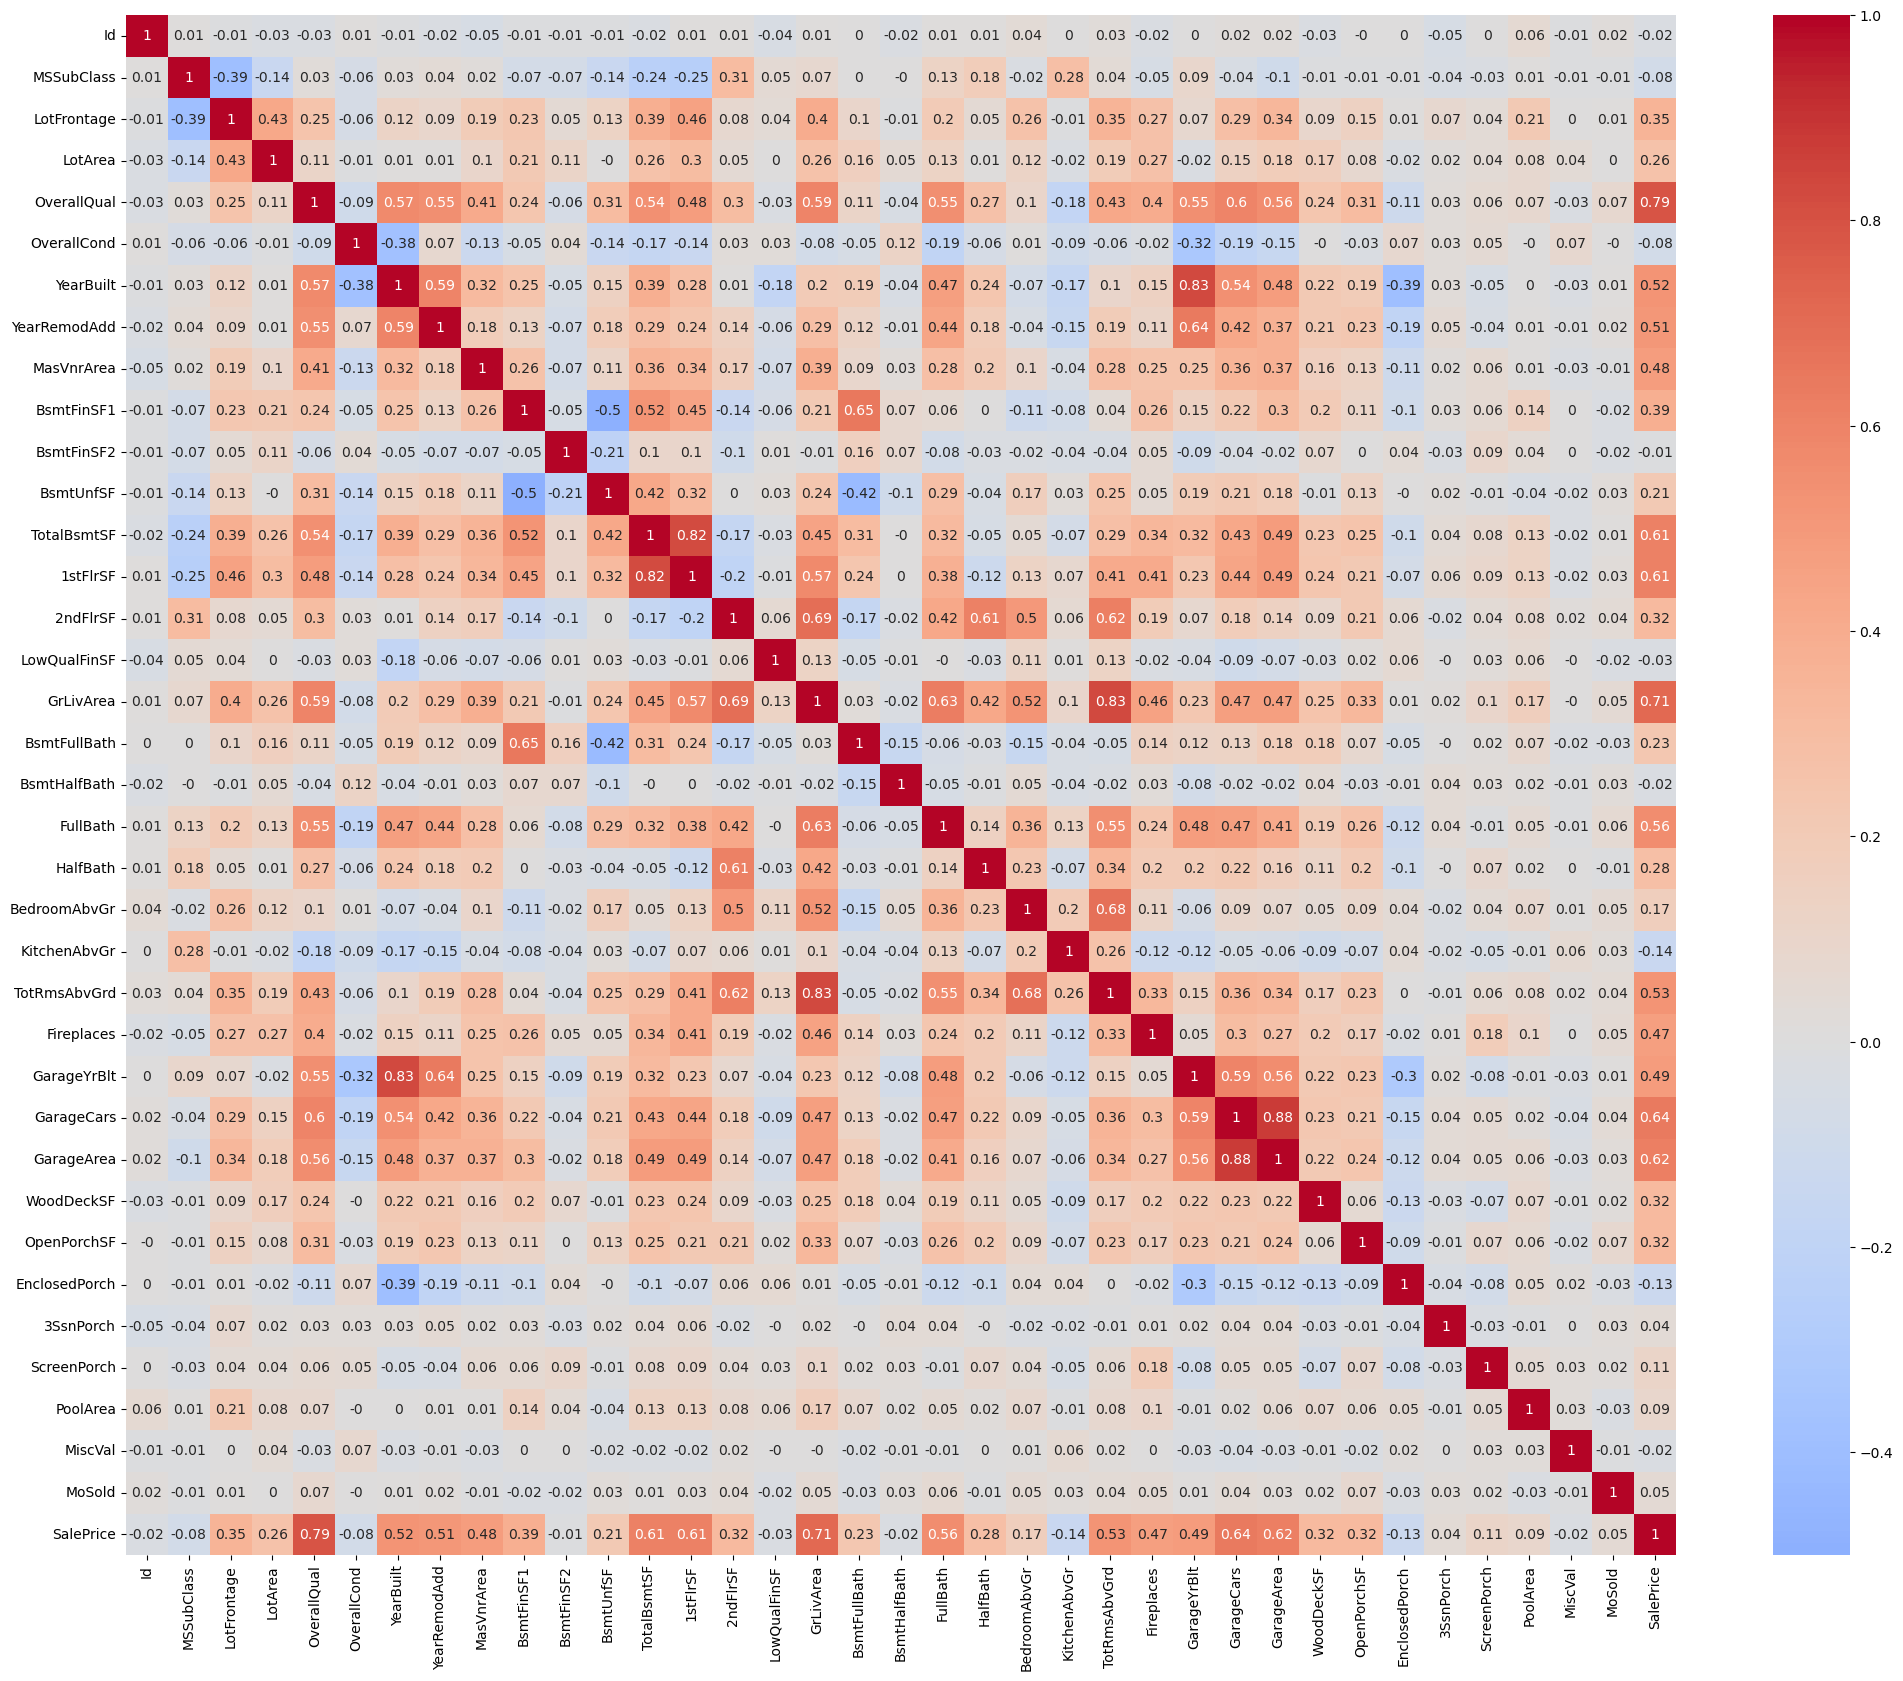

In [11]:
# Checking the corelation
plt.subplots(figsize = (25,20))
#Plotting heatmap of numerical features
sns.heatmap(round(df_num.corr(),2), cmap='coolwarm' , annot=True, center = 0)
plt.show()

In [12]:
df['age']=df['YrSold']-df['YearBuilt']
df['garage_age'] = df['YrSold'] - df['GarageYrBlt']
df['remodel_age'] = df['YrSold'] - df['YearRemodAdd']

df.drop('GarageYrBlt',axis=1,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 83 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
# Converting the Year to String since they are categorical features and should not be treated as numerical features
df[['MSSubClass']] = df[['MSSubClass']].astype(str) 
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)
df.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1         60       RL         65.0     8450   Pave   NaN      Reg   
1   2         20       RL         80.0     9600   Pave   NaN      Reg   
2   3         60       RL         68.0    11250   Pave   NaN      IR1   
3   4         70       RL         60.0     9550   Pave   NaN      IR1   
4   5         60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... MiscFeature MiscVal MoSold YrSold SaleType  \
0         Lvl    AllPub  ...         NaN       0      2   2008       WD   
1         Lvl    AllPub  ...         NaN       0      5   2007       WD   
2         Lvl    AllPub  ...         NaN       0      9   2008       WD   
3         Lvl    AllPub  ...         NaN       0      2   2006       WD   
4         Lvl    AllPub  ...         NaN       0     12   2008       WD   

  SaleCondition SalePrice  age  garage_age  remodel_age  
0        Normal    208500    5         5.0            5  
1        Normal    181500   31        31.0           31  
2        Normal    223500    7         7.0            6  
3       Abnorml    140000   91         8.0           36  
4        Normal    250000    8         8.0            8  

[5 rows x 83 columns]

In [15]:
# getting list of columns with Null Values again
print(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)[ round(df.isnull().sum()/len(df.index),2) > 0 ] )

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageCond       5.55
GarageFinish     5.55
GarageQual       5.55
garage_age       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
dtype: float64


In [16]:

#NA = No Pool for PoolQC
df['PoolQC'] = df['PoolQC'].fillna('None')
#NA = No Misc Feature for MiscFeature
df['MiscFeature'] = df['MiscFeature'].fillna('None')
#NA = No Alley
df['Alley'] = df['Alley'].fillna('None')
#NA = No Fireplace for FireplaceQu
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')
#NA = No Fence
df['Fence'] = df['Fence'].fillna('None')
#NA = No Fireplace
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')
#NA = No Garage
df['GarageCond'] = df['GarageCond'].fillna('None')
df['GarageType'] = df['GarageType'].fillna('None')
df['GarageFinish'] = df['GarageFinish'].fillna('None')
df['GarageQual'] = df['GarageQual'].fillna('None')
df['garage_age'] = df['GarageQual'].fillna(0)   #No Garage No Age
#NA = No Basement
df['BsmtExposure'] = df['BsmtExposure'].fillna('None')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('None')
df['BsmtCond'] = df['BsmtCond'].fillna('None')
df['BsmtQual'] = df['BsmtQual'].fillna('None')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')
#NA = No Masonery Area
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [17]:
#LotFrontage : Replacing Null value with the median of the neighbourhood
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [18]:
# Filling the Electrical 0.06% rows with the mode
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [19]:
print(df['Utilities'].value_counts())
print(df['Street'].value_counts())
print(df['PoolQC'].value_counts())

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
None    1453
Gd         3
Ex         2
Fa         2
Name: PoolQC, dtype: int64


In [20]:
# Trying to remove redundant features
def redundant_feature(df):
    redundant = []
    for i in df.columns:
        counts = df[i].value_counts()
        count_max = counts.iloc[0]
        if count_max / len(df) * 100 > 99:
            redundant.append(i)
    redundant = list(redundant)
    return redundant

In [21]:
redundant_features = redundant_feature(df)
redundant_features

['Street', 'Utilities', 'PoolArea', 'PoolQC']

In [22]:
df.drop(redundant_features,axis=1,inplace=True)
df.shape

(1460, 79)

In [23]:
def drop_outliers(x):
    list = []
    outl_col = ['GrLivArea','GarageArea','TotalBsmtSF','LotArea']
    for col in outl_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x  
df = drop_outliers(df)
df.shape

(1455, 79)

In [24]:
#Vintage house with remodified version of it plays a important role in prediction(i.e. high price )
df['YrBltAndRemod']=df['YearBuilt']+df['YearRemodAdd']
#Overall area for all floors and basement plays an important role, hence creating total area in square foot column
df['Total_sqr_footage'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'])
# Creating derived column for total number of bathrooms column
df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))
#Creating derived column for total porch area 
df['Total_porch_sf'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF'])

In [25]:
#Creating Dummy Variables for Categorical Columns
num_col=[]
cat_col=[]
for i in df.columns:
    if df[i].dtypes != 'O':
        num_col.append(i)
    else:
        cat_col.append(i)
df_dummy= pd.get_dummies(df[cat_col])   
df=pd.concat([df,df_dummy],axis=1)
df= df.drop(cat_col,axis=1)

In [26]:
df.head()

Id  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1         65.0     8450            7            5       2003   
1   2         80.0     9600            6            8       1976   
2   3         68.0    11250            7            5       2001   
3   4         60.0     9550            7            5       1915   
4   5         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  \
0          2003       196.0         706           0  ...   
1          1976         0.0         978           0  ...   
2          2002       162.0         486           0  ...   
3          1970         0.0         216           0  ...   
4          2000       350.0         655           0  ...   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0                     0                     1   
1                     0                     0                     1   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     1   

   SaleCondition_Partial  garage_age_Ex  garage_age_Fa  garage_age_Gd  \
0                      0              0              0              0   
1                      0              0              0              0   
2                      0              0              0              0   
3                      0              0              0              0   
4                      0              0              0              0   

   garage_age_None  garage_age_Po  garage_age_TA  
0                0              0              1  
1                0              0              1  
2                0              0              1  
3                0              0              1  
4                0              0              1  

[5 rows x 334 columns]

In [27]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [28]:
corr = X.corr()
corr1 = corr[abs(corr)>=.6]
corr2 =  corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool))  #To remove repetition and 1 correlations
corr_result = corr2.stack()
print(corr_result[(abs(corr_result) > 0.6)])

OverallQual           GarageCars               0.602025
                      YrBltAndRemod            0.628465
                      ExterQual_TA            -0.647338
YearBuilt             age                     -0.999036
                      YrBltAndRemod            0.931280
                                                 ...   
SaleType_New          SaleCondition_Partial    0.986718
SaleType_WD           SaleCondition_Normal     0.632805
                      SaleCondition_Partial   -0.768294
SaleCondition_Normal  SaleCondition_Partial   -0.652835
garage_age_None       garage_age_TA           -0.718832
Length: 165, dtype: float64


In [29]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

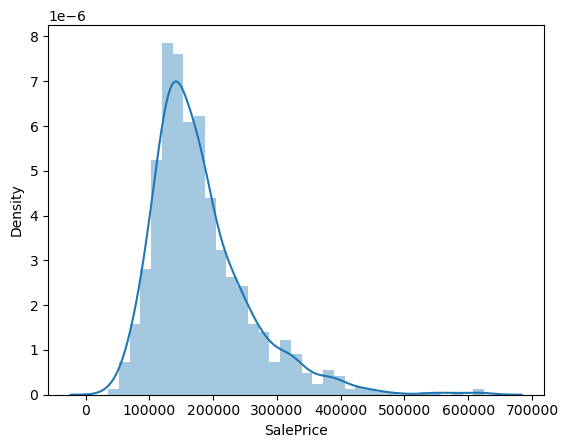

In [30]:
#Distribution of Target Variable
sns.distplot(y_train)
plt.show()

In [31]:
#Transforming the Target feature to make the data gaussian
pt = PowerTransformer(method='box-cox', standardize=False)
y_train = pt.fit_transform(y_train.to_frame())
y_test = pt.transform(y_test.to_frame())

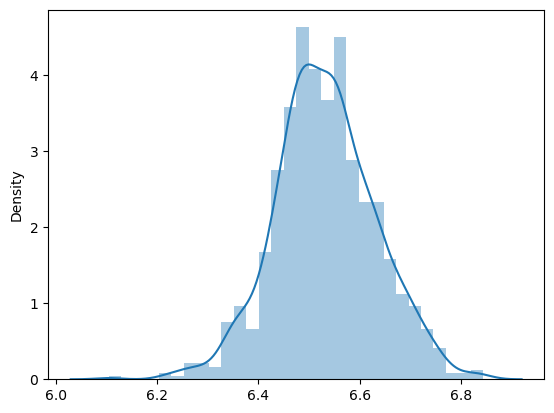

In [32]:
sns.distplot(y_train)
plt.show()

In [33]:
# Scaling the data using a Minmax Scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = DataFrame(X_train)
X_train.columns = X.columns
X_test = scaler.transform(X_test)
X_test = DataFrame(X_test)
X_test.columns = X.columns
X_train.head()

Id  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0  0.727023     0.068493  0.052116        0.750     0.428571   0.934783   
1  0.902606     0.136986  0.128504        0.750     0.428571   0.985507   
2  0.100823     0.150685  0.118124        0.625     0.428571   0.934783   
3  0.796982     0.301370  0.106880        0.375     0.428571   0.695652   
4  0.468450     0.236301  0.143217        0.875     0.428571   0.942029   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  \
0      0.850000    0.000000    0.281536         0.0  ...   
1      0.966667    0.168750    0.000000         0.0  ...   
2      0.850000    0.112500    0.000000         0.0  ...   
3      0.300000    0.000000    0.224863         0.0  ...   
4      0.866667    0.134375    0.484004         0.0  ...   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                   0.0                   0.0                   1.0   
1                   0.0                   0.0                   1.0   
2                   0.0                   0.0                   1.0   
3                   0.0                   0.0                   1.0   
4                   0.0                   0.0                   1.0   

   SaleCondition_Partial  garage_age_Ex  garage_age_Fa  garage_age_Gd  \
0                    0.0            0.0            0.0            0.0   
1                    0.0            0.0            0.0            0.0   
2                    0.0            0.0            0.0            0.0   
3                    0.0            0.0            0.0            0.0   
4                    0.0            0.0            0.0            0.0   

   garage_age_None  garage_age_Po  garage_age_TA  
0              0.0            0.0            1.0  
1              0.0            0.0            1.0  
2              0.0            0.0            1.0  
3              0.0            0.0            1.0  
4              0.0            0.0            1.0  

[5 rows x 333 columns]

Fitting 11 folds for each of 28 candidates, totalling 308 fits


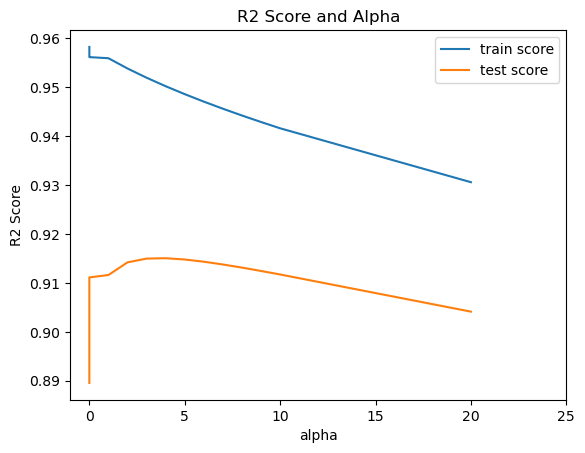

The optimum alpha is 4
The R2 Score of the model on the test dataset for optimum alpha is 0.8735665973407686
The MSE of the model on the test dataset for optimum alpha is 0.0013531928114848802


In [34]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

# Using RFE to find top 300 variables
rfe = RFE(estimator=Ridge(), n_features_to_select=300)
rfe = rfe.fit(X_train,y_train)
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
ridge_final = Ridge(alpha=alpha)
ridge_final.fit(X_train_rfe,y_train)
ridge_coef = ridge_final.coef_
y_test_pred = ridge_final.predict(X_test_rfe)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

In [35]:
# Chekcing the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
high_vif = vif[vif['VIF']>10]
high_vif

Features    VIF
150    Exterior2nd_Stone    inf
179          BsmtCond_Po    inf
185     BsmtFinType1_ALQ    inf
186     BsmtFinType1_BLQ    inf
187     BsmtFinType1_GLQ    inf
..                   ...    ...
228       FireplaceQu_Gd  15.41
231       FireplaceQu_TA  13.66
43         MSSubClass_30  12.79
127  Exterior1st_AsbShng  12.18
24            GarageCars  10.18

[218 rows x 2 columns]

In [36]:
# Dropping cols with high VIF
X_train_rfe2 = X_train_rfe.drop(high_vif.Features,axis=1)
X_test_rfe2 = X_test_rfe.drop(high_vif.Features,axis=1)

Fitting 11 folds for each of 28 candidates, totalling 308 fits


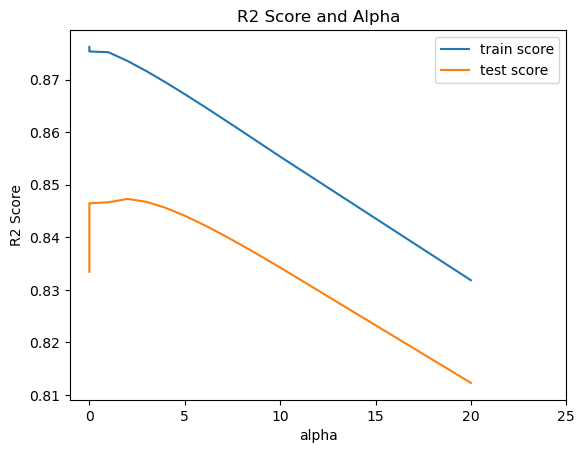

The optimum alpha is 2
The R2 Score of the model on the test dataset for optimum alpha is 0.8320983883420496
The MSE of the model on the test dataset for optimum alpha is 0.0017970192144921714


In [37]:
# second Ridge Model
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge(random_state=100)

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe2, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
ridge_final2 = Ridge(alpha=alpha,random_state=100)
ridge_final2.fit(X_train_rfe2,y_train)
ridge_coef2 = ridge_final2.coef_
y_test_pred = ridge_final2.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

In [38]:
#Displaing the co-efficients of the model
ridge_coeff2 = pd.DataFrame(np.atleast_2d(ridge_coef2),columns=X_train_rfe2.columns)
ridge_coeff2 = ridge_coeff2.T
ridge_coeff2.rename(columns={0: 'Ridge Co-Efficient'},inplace=True)
ridge_coeff2.sort_values(by=['Ridge Co-Efficient'], ascending=False,inplace=True)
ridge_coeff2.head(20)

Ridge Co-Efficient
OverallQual                     0.162935
GarageArea                      0.107386
TotRmsAbvGrd                    0.093773
LotArea                         0.073219
OverallCond                     0.054984
Fireplaces                      0.049691
LotFrontage                     0.043195
Neighborhood_StoneBr            0.038987
BsmtExposure_Gd                 0.034140
Neighborhood_NoRidge            0.026605
Neighborhood_NridgHt            0.024943
Exterior1st_BrkFace             0.023431
BedroomAbvGr                    0.023401
Neighborhood_Crawfor            0.022682
MasVnrArea                      0.020922
HeatingQC_Ex                    0.020070
Neighborhood_Somerst            0.018361
Neighborhood_Veenker            0.017562
Exterior1st_Stone               0.013806
LotConfig_CulDSac               0.011839

In [39]:
lasso1 = Lasso(alpha=0.0001)        
lasso1.fit(X_train_rfe2, y_train) 

y_test_pred = lasso1.predict(X_test_rfe2)
print('The R2 Score of the model:',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset :', mean_squared_error(y_test, y_test_pred))

The R2 Score of the model: 0.8348284633821069
The MSE of the model on the test dataset : 0.001767799737349909


Fitting 11 folds for each of 11 candidates, totalling 121 fits


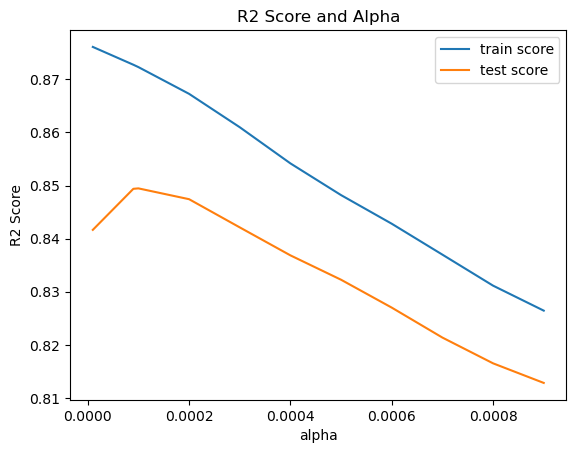

The optimum alpha is 0.0001
The R2 Score of the model on the test dataset for optimum alpha is 0.8348284633821069
The MSE of the model on the test dataset for optimum alpha is 0.001767799737349909


In [40]:
params = {'alpha': [0.00001, 0.00009, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009 ]}
lasso = Lasso(random_state=100)

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe2, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
lasso_final2 = Lasso(alpha=alpha,random_state=100)
lasso_final2.fit(X_train_rfe2,y_train)
lasso_coef2 = lasso_final2.coef_
y_test_pred = lasso_final2.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

In [41]:
#Displaing the co-efficients of the model
lasso_coeff2 = pd.DataFrame(np.atleast_2d(lasso_coef2),columns=X_train_rfe2.columns)
lasso_coeff2 = lasso_coeff2.T
lasso_coeff2.rename(columns={0: "Lasso Co-Efficient"},inplace=True)
lasso_coeff2.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
lasso_coeff2.head(20)

Lasso Co-Efficient
OverallQual                     0.196709
GarageArea                      0.113201
TotRmsAbvGrd                    0.104953
LotArea                         0.093753
OverallCond                     0.056684
Fireplaces                      0.045609
LotFrontage                     0.031987
Neighborhood_StoneBr            0.030669
BsmtExposure_Gd                 0.029322
Exterior1st_BrkFace             0.022536
Neighborhood_NoRidge            0.020244
HeatingQC_Ex                    0.018270
Neighborhood_Crawfor            0.018144
Neighborhood_NridgHt            0.017683
MasVnrArea                      0.015670
Neighborhood_Somerst            0.013342
LotConfig_CulDSac               0.008728
BsmtExposure_Av                 0.007239
FireplaceQu_Fa                  0.005742
HeatingQC_Gd                    0.005226

In [42]:
# Building Ridge Model by doubling the value of alpha to 4
ridge_double = Ridge(alpha=4,random_state=100)
ridge_double.fit(X_train_rfe2,y_train)
ridge_double_coef = ridge_double.coef_
y_test_pred = ridge_double.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for doubled alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for doubled alpha is', mean_squared_error(y_test, y_test_pred))
ridge_double_coeff = pd.DataFrame(np.atleast_2d(ridge_double_coef),columns=X_train_rfe2.columns)
ridge_double_coeff = ridge_double_coeff.T
ridge_double_coeff.rename(columns={0: 'Ridge Doubled Alpha Co-Efficient'},inplace=True)
ridge_double_coeff.sort_values(by=['Ridge Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
ridge_double_coeff.head(20)

The R2 Score of the model on the test dataset for doubled alpha is 0.8309318753857458
The MSE of the model on the test dataset for doubled alpha is 0.0018095041821808825
The most important predictor variables are as follows:


Ridge Doubled Alpha Co-Efficient
OverallQual                                   0.148775
GarageArea                                    0.101240
TotRmsAbvGrd                                  0.089423
LotArea                                       0.060058
Fireplaces                                    0.052461
OverallCond                                   0.050050
LotFrontage                                   0.038274
Neighborhood_StoneBr                          0.036085
BsmtExposure_Gd                               0.034681
Neighborhood_NoRidge                          0.027118
BedroomAbvGr                                  0.026862
Neighborhood_NridgHt                          0.026002
Neighborhood_Crawfor                          0.022748
Exterior1st_BrkFace                           0.022222
MasVnrArea                                    0.022149
HeatingQC_Ex                                  0.021808
Neighborhood_Somerst                          0.018438
Neighborhood_Veenker                          0.015203
ExterQual_Ex                                  0.013263
LotConfig_CulDSac                             0.012357

In [43]:
# Building Lasso Model by doubling the value of alpha to 0.0002
lasso_double = Lasso(alpha=0.0002,random_state=100)
lasso_double.fit(X_train_rfe2,y_train)
lasso_double_coef = lasso_double.coef_
y_test_pred = lasso_double.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for doubled alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for doubled alpha is', mean_squared_error(y_test, y_test_pred))
lasso_double_coeff = pd.DataFrame(np.atleast_2d(lasso_double_coef),columns=X_train_rfe2.columns)
lasso_double_coeff = lasso_double_coeff.T
lasso_double_coeff.rename(columns={0: 'Lasso Doubled Alpha Co-Efficient'},inplace=True)
lasso_double_coeff.sort_values(by=['Lasso Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso_double_coeff.head(20)

The R2 Score of the model on the test dataset for doubled alpha is 0.8333553457535068
The MSE of the model on the test dataset for doubled alpha is 0.0017835662368948604
The most important predictor variables are as follows:


Lasso Doubled Alpha Co-Efficient
OverallQual                                   0.208702
GarageArea                                    0.115104
TotRmsAbvGrd                                  0.105883
LotArea                                       0.084957
OverallCond                                   0.052584
Fireplaces                                    0.046302
BsmtExposure_Gd                               0.027667
Neighborhood_StoneBr                          0.021443
HeatingQC_Ex                                  0.018836
Exterior1st_BrkFace                           0.018829
LotFrontage                                   0.018477
Neighborhood_Crawfor                          0.016289
Neighborhood_NoRidge                          0.016150
Neighborhood_NridgHt                          0.014497
MasVnrArea                                    0.012091
Neighborhood_Somerst                          0.009959
LotConfig_CulDSac                             0.007112
BsmtExposure_Av                               0.005791
HeatingQC_Gd                                  0.005126
MoSold_6                                      0.003072

In [45]:
#Removing the 5 most important predictor variables from the incoming dataset
X_test_rfe3 = X_test_rfe2.drop(['GarageArea','TotRmsAbvGrd','OverallCond','LotArea'],axis=1)
X_train_rfe3 = X_train_rfe2.drop(['GarageArea','TotRmsAbvGrd','OverallCond','LotArea'],axis=1)

# Building Lasso Model with the new dataset
lasso3 = Lasso(alpha=0.0001,random_state=100)
lasso3.fit(X_train_rfe3,y_train)
lasso3_coef = lasso3.coef_
y_test_pred = lasso3.predict(X_test_rfe3)
print('The R2 Score of the model on the test dataset is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset is', mean_squared_error(y_test, y_test_pred))
lasso3_coeff = pd.DataFrame(np.atleast_2d(lasso3_coef),columns=X_train_rfe3.columns)
lasso3_coeff = lasso3_coeff.T
lasso3_coeff.rename(columns={0: 'Lasso Co-Efficient'},inplace=True)
lasso3_coeff.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
lasso3_coeff.head(5)

The R2 Score of the model on the test dataset is 0.7889606233141568
The MSE of the model on the test dataset is 0.0022587145601169313


Lasso Co-Efficient
OverallQual                     0.249049
LotFrontage                     0.112357
BedroomAbvGr                    0.092464
Fireplaces                      0.059077
Neighborhood_StoneBr            0.036109